In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time

### MNIST digits classification dataset
[Data Types](https://keras.io/api/datasets/mnist/)
* x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.
* y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.
* x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.
* y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [2]:
tf.keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Linearise
x_train = x_train.reshape(60000, 784)/255.0
x_test = x_test.reshape(10000, 784)/255.0
# One Hot Encoding
y_train_1hot = to_categorical(y_train, 10)
y_test_1hot = to_categorical(y_test, 10)

### Model

* Erste Schicht 15700 W: 784 x 20 W + 20 Bias 
* Zweite Schicht 210: 20 x 10W + 10 Bias

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(20, input_dim=784, activation='linear'))
model.add(Dense(10, activation='softmax'))

### Compile

In [16]:
sgd = SGD(learning_rate = 0.1)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['acc'])

### Fit

In [17]:
start_time = time.time()
epochs = 50
history = model.fit(x_train, y_train_1hot, 
                     epochs=epochs,
                     batch_size=32,
                     verbose=0,
                     validation_data = (x_test, y_test_1hot))

duration = time.time() - start_time
print(f'TRAININGSDAUER: {duration:.2f} Sek.')

TRAININGSDAUER: 283.27 Sek.


### Evaluation

In [18]:
def set_subplot(ax, y_label, traindata, testdata, ylim):
    e_range = range(1, epochs + 1)
    ax.plot(e_range, traindata, 'b', label='Training')
    ax.plot(e_range, testdata, 'g', label='Test')
    ax.set_xlabel('Epochen')
    ax.set_ylabel(y_label)
    ax.legend()
    ax.grid()
    ax.set_ylim(ylim)
    ax.set_title(y_label)

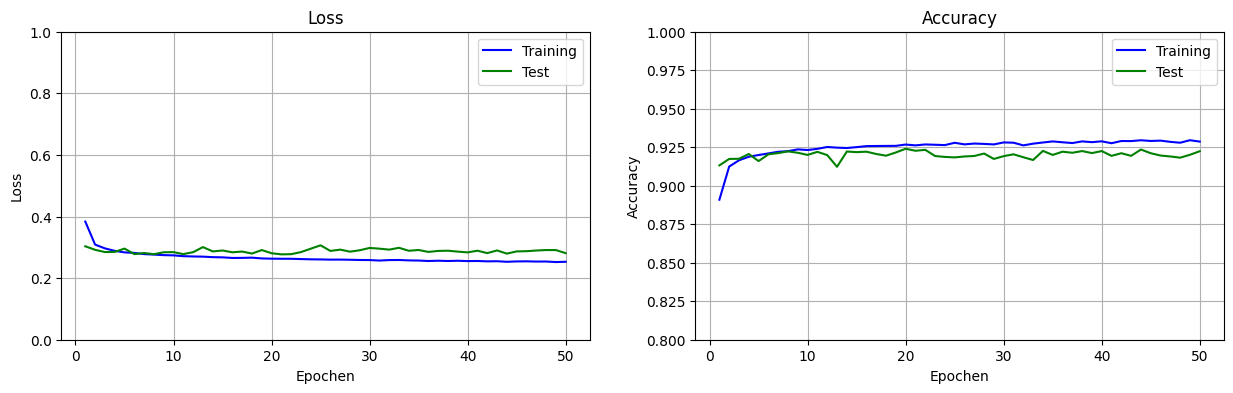

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

set_subplot(ax[0], 'Loss', history.history['loss'], 
            history.history['val_loss'], [0, 1])
set_subplot(ax[1], 'Accuracy', history.history['acc'], 
            history.history['val_acc'], [0.8, 1])
plt.show()

In [21]:
loss, acc = model.evaluate(x_test, y_test_1hot)
print(f"Evaluation auf den Testdaten:\n\nLoss = {loss:.3f}\nAccuracy = {acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.2811 - acc: 0.9224
Evaluation auf den Testdaten:

Loss = 0.281
Accuracy = 0.922


### Save and load
[https://www.tensorflow.org/tutorials/keras/save_and_load](https://www.tensorflow.org/tutorials/keras/save_and_load)

In [23]:
model.save_weights('./checkpoints/weights')